✓ All libraries imported successfully!
📁 Please upload your EXCEL dataset file (.xlsx or .xls)...


Saving cibil_score_fraud_detection.csv to cibil_score_fraud_detection.csv
✓ CSV file 'cibil_score_fraud_detection.csv' loaded successfully!

✓ Dataset loaded successfully!
Dataset shape: (5000, 13)
Rows: 5000 | Columns: 13

📊 First 5 rows of the dataset:
   customer_id  age  annual_income  cibil_score  num_credit_cards  num_loans  \
0            1   59         650983          358                 1          0   
1            2   49        2063062          368                 7          0   
2            3   35        1929004          745                 2          2   
3            4   63        2125618          687                 5          2   
4            5   28        1581173          385                 4          3   

   credit_utilization  late_payments_12m  new_accounts_6m  ip_risk_score  \
0                0.45                  3                1           0.71   
1                0.96                  8                0           0.68   
2                0.79               

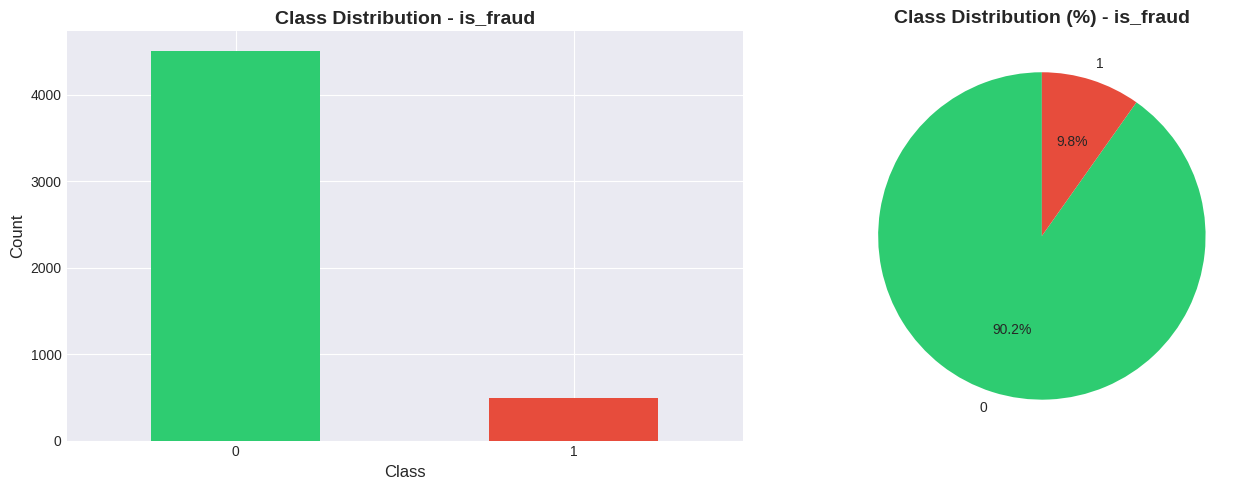


📈 Numerical Features (12):
['customer_id', 'age', 'annual_income', 'cibil_score', 'num_credit_cards', 'num_loans', 'credit_utilization', 'late_payments_12m', 'new_accounts_6m', 'ip_risk_score', 'device_change_count', 'location_change_count']


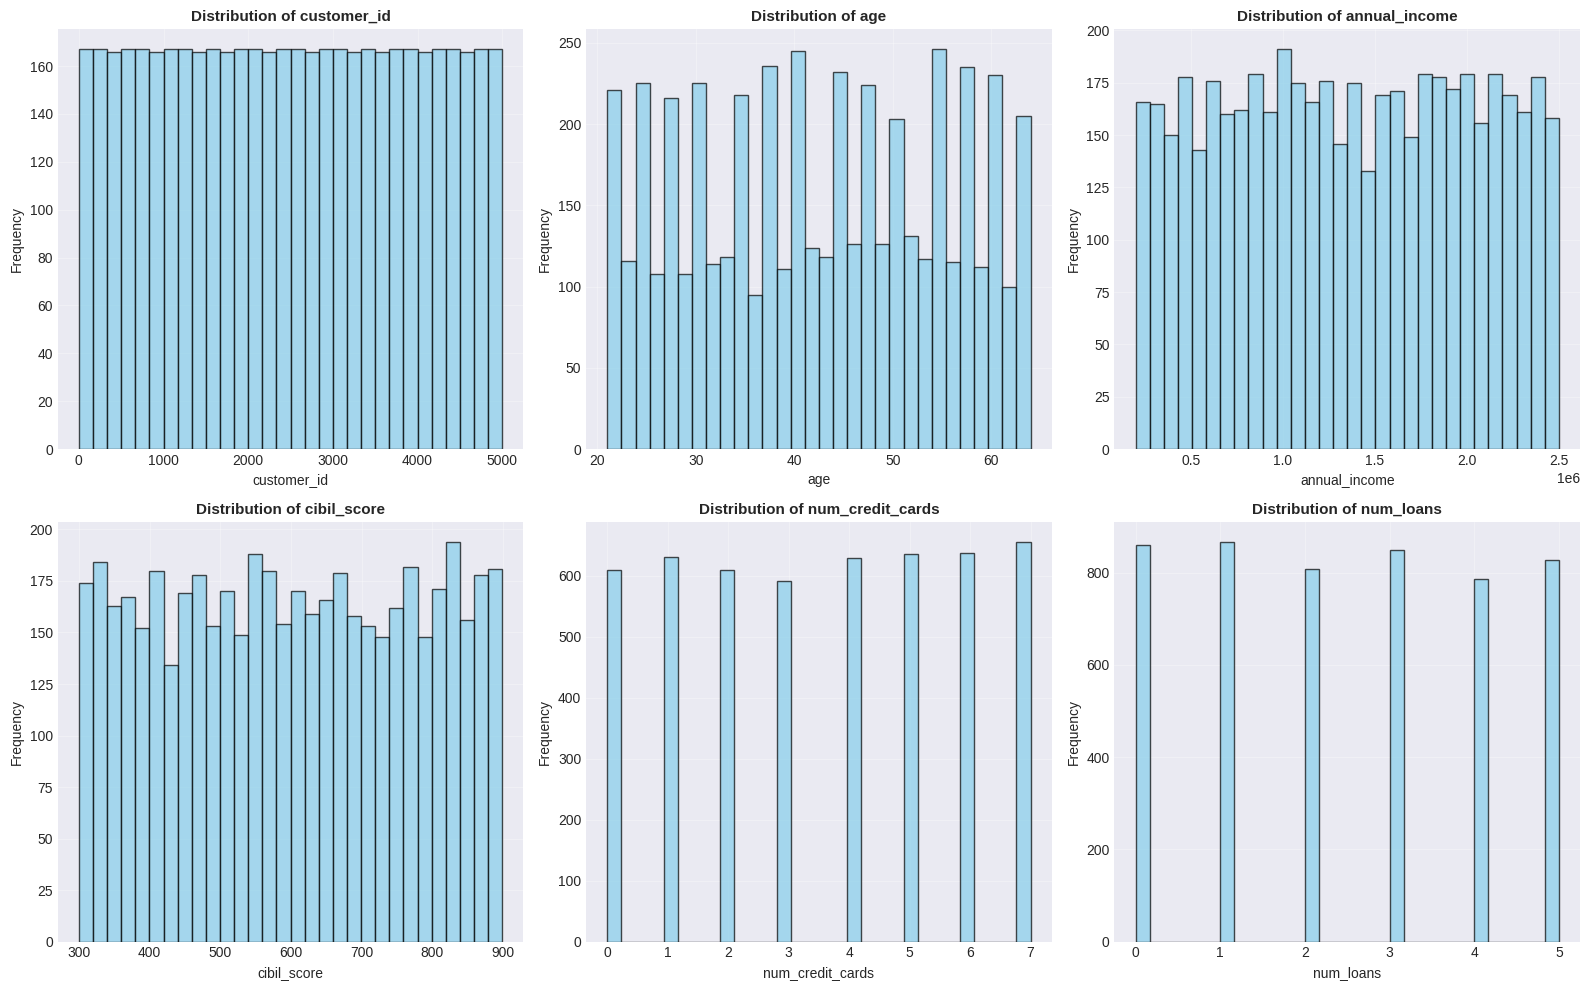


🔥 CORRELATION ANALYSIS...


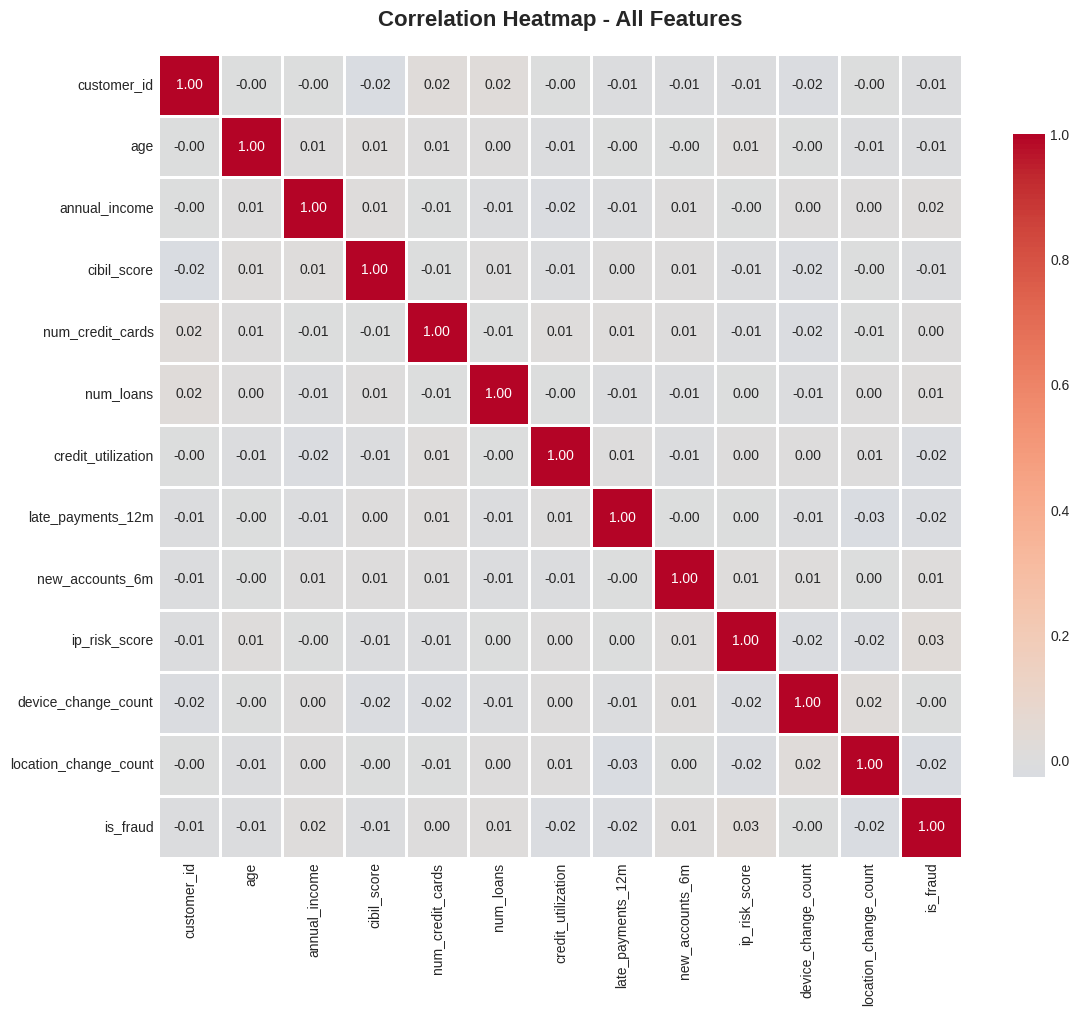


📊 Features most correlated with 'is_fraud':
is_fraud                 1.000000
ip_risk_score            0.032265
annual_income            0.016215
num_loans                0.014498
new_accounts_6m          0.013639
num_credit_cards         0.002214
device_change_count     -0.002964
customer_id             -0.009228
age                     -0.010704
cibil_score             -0.011102
late_payments_12m       -0.018312
credit_utilization      -0.020302
location_change_count   -0.024304
Name: is_fraud, dtype: float64

📍 SCATTER PLOT: CIBIL SCORE vs CREDIT UTILIZATION...


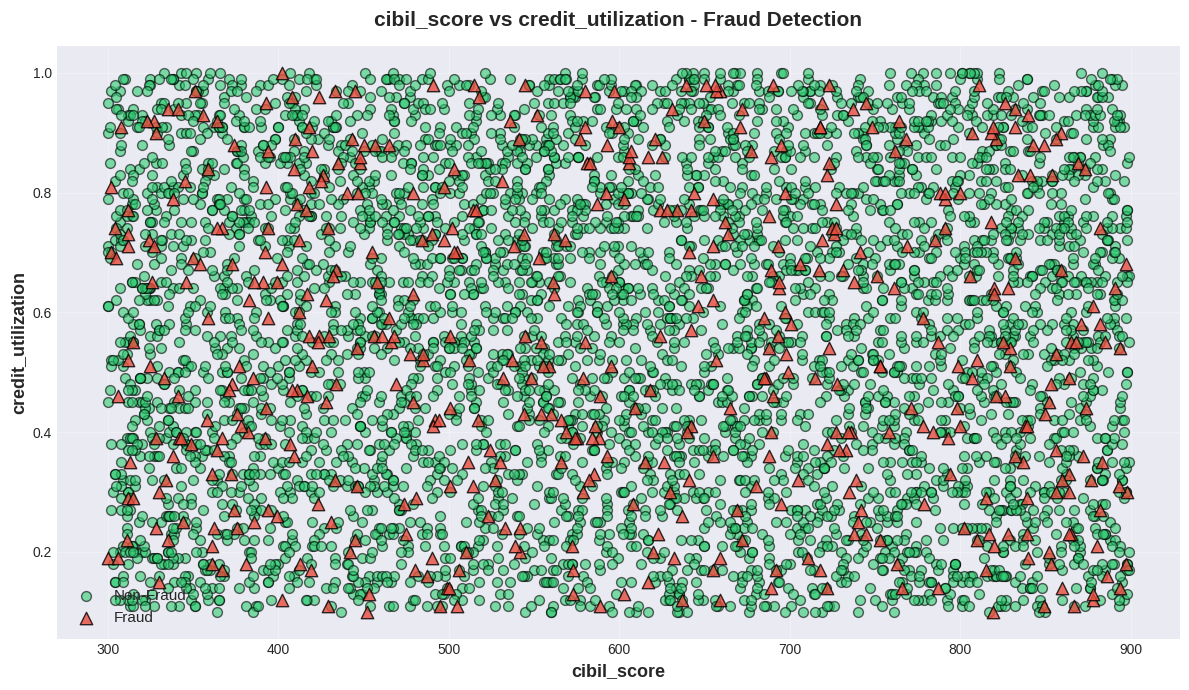

✓ Scatter plot created for cibil_score vs credit_utilization

⚙️ FEATURE ENGINEERING & ENCODING...

📝 Categorical Features: []
✓ No categorical features to encode

✓ Feature matrix shape: (5000, 12)
✓ Target vector shape: (5000,)

✂️ SPLITTING DATA INTO TRAIN AND TEST SETS...
Training set size: 4000 samples
Test set size: 1000 samples

Class distribution in training set:
is_fraud
0    3608
1     392
Name: count, dtype: int64

Class distribution in test set:
is_fraud
0    902
1     98
Name: count, dtype: int64

📏 APPLYING FEATURE SCALING (STANDARDIZATION)...
✓ Feature scaling completed!
Scaled training set shape: (4000, 12)
Scaled test set shape: (1000, 12)

⚖️ HANDLING CLASS IMBALANCE USING SMOTE...
Original class distribution:
Class 0: 3608
Class 1: 392

Balanced class distribution:
Class 0: 3608
Class 1: 3608
✓ SMOTE applied successfully!

🤖 TRAINING LOGISTIC REGRESSION MODEL...
✓ Logistic Regression Model Trained!

📊 Logistic Regression Performance:
Accuracy:  0.5470
Precision: 0.09

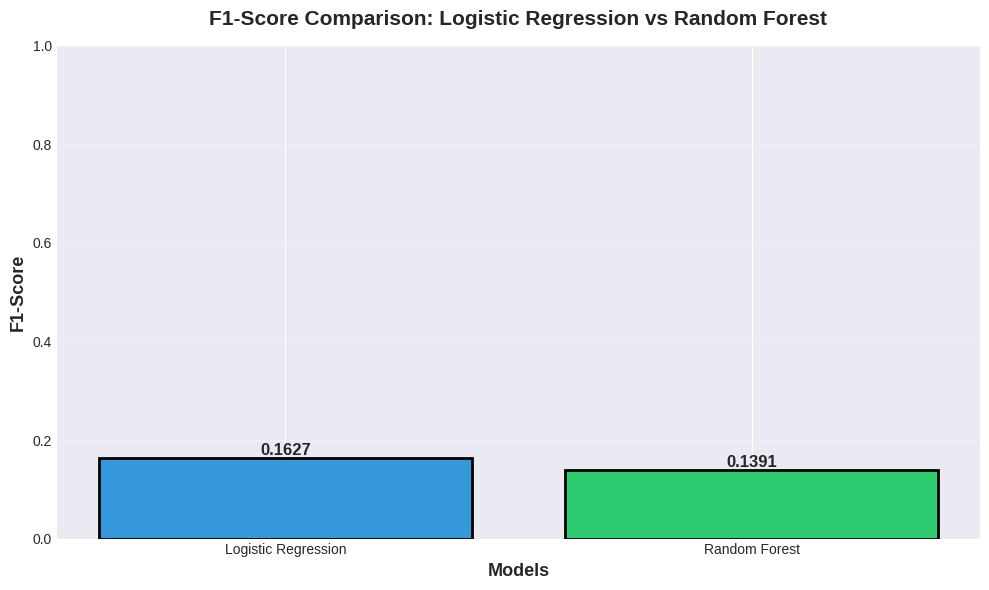

Logistic Regression F1-Score: 0.1627
Random Forest F1-Score: 0.1391

🔢 CONFUSION MATRICES...


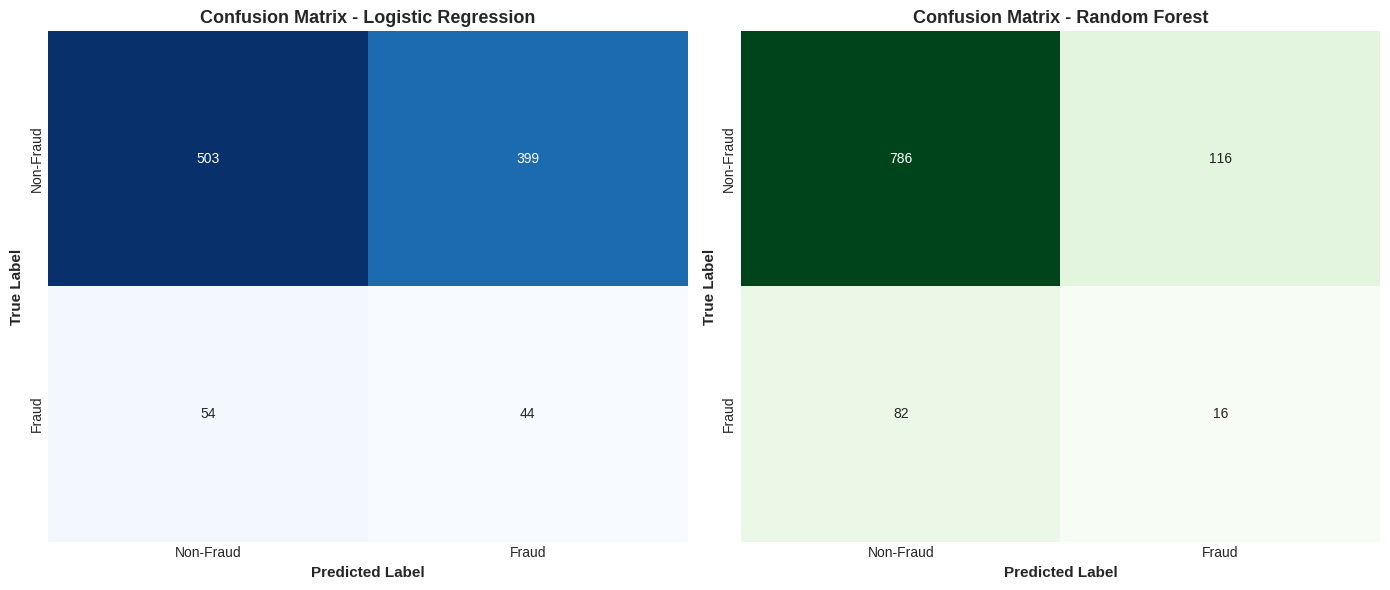

✓ Confusion matrices plotted successfully!

📈 ROC CURVE ANALYSIS...


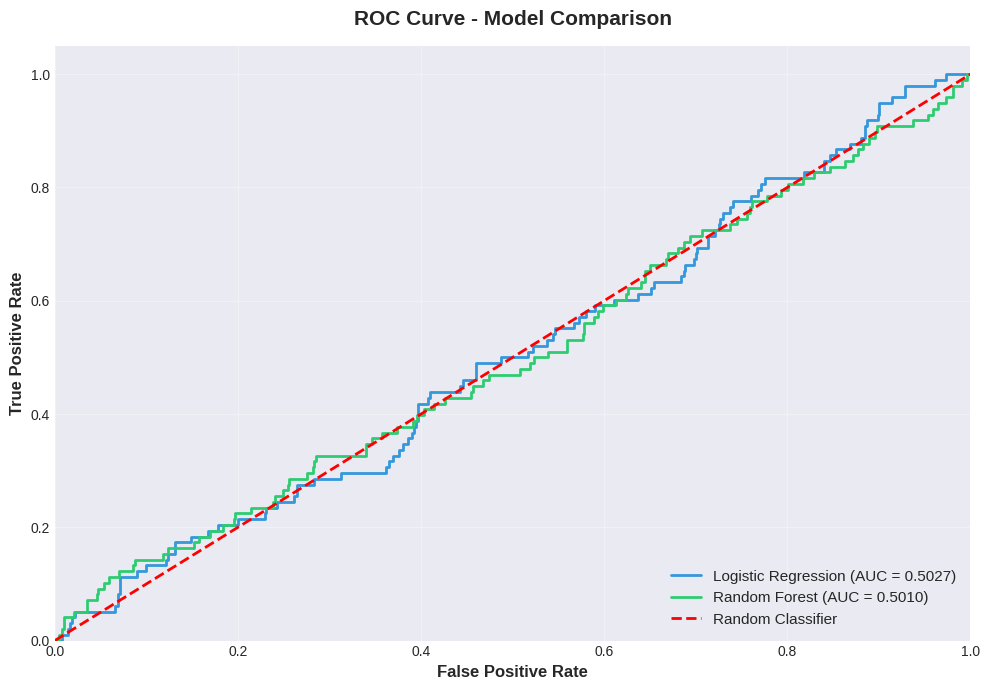

Logistic Regression AUC: 0.5027
Random Forest AUC: 0.5010

📉 PRECISION-RECALL CURVE ANALYSIS...


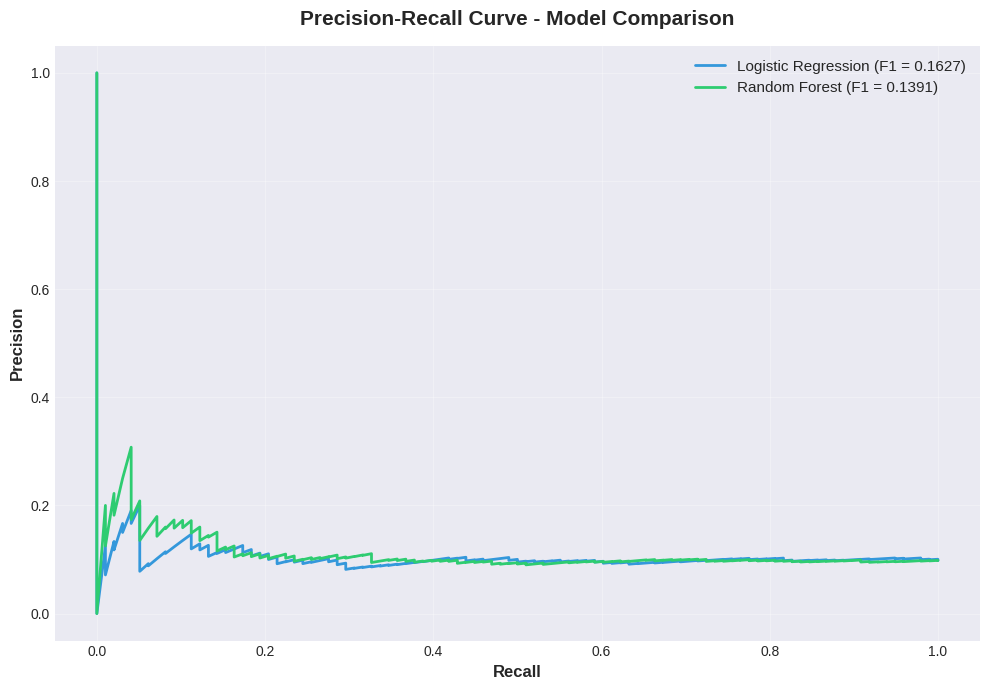

✓ Precision-Recall curves plotted successfully!

🎨 PCA VISUALIZATION - 2D PROJECTION...
Explained variance ratio: [0.09805462 0.09647774]
Total variance explained: 0.1945


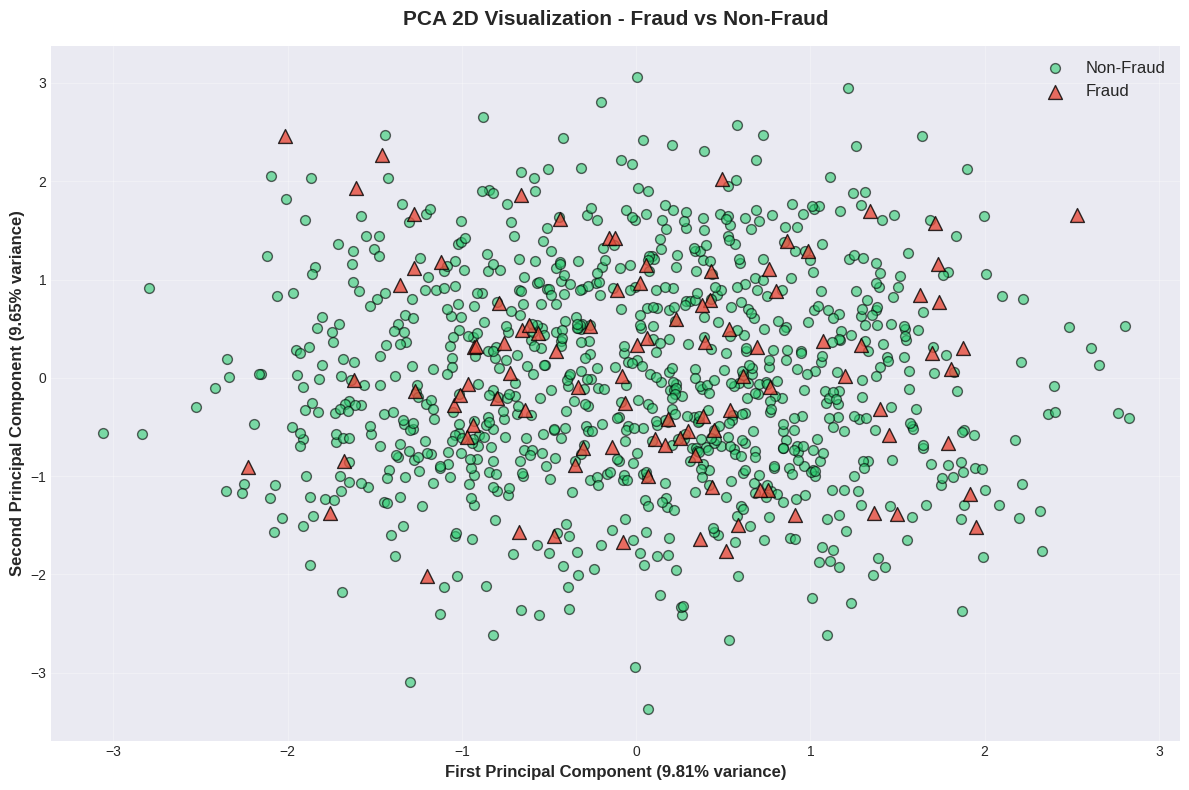

✓ PCA visualization completed!

📊 COMPREHENSIVE MODEL COMPARISON...

🏆 Model Performance Comparison Table:
              Model  Accuracy  Precision   Recall  F1-Score      AUC
Logistic Regression     0.547   0.099323 0.448980  0.162662 0.502670
      Random Forest     0.802   0.121212 0.163265  0.139130 0.501041


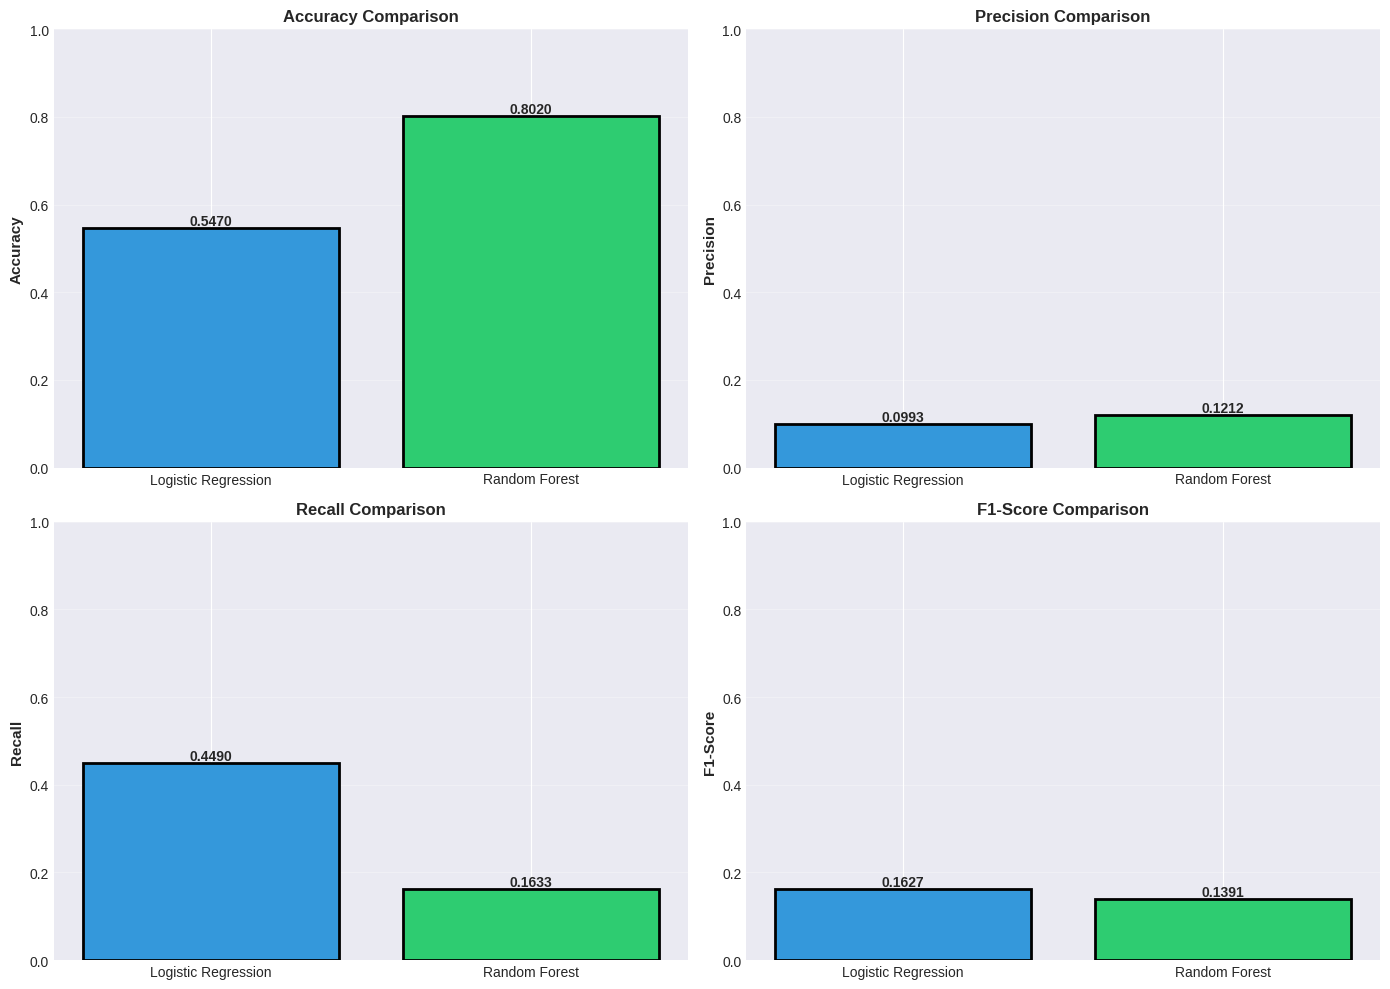


💡 FINAL RECOMMENDATIONS & INSIGHTS...

🏆 Best Performing Model: Logistic Regression
   F1-Score: 0.1627

📌 Key Insights:
1. Total samples analyzed: 5000
2. Class imbalance handled using SMOTE
3. Feature scaling applied for optimal performance
4. 12 features used for prediction
5. Both models evaluated on 1000 test samples

🎯 Production Deployment Recommendations:
• Use the best performing model for production deployment
• Monitor model performance regularly and retrain as needed
• Set appropriate threshold based on business requirements
• Implement real-time fraud detection pipeline
• Create alerts for high-risk fraud cases
• Regularly update training data with new fraud patterns

✅ CIBIL SCORE FRAUD DETECTION PROJECT COMPLETED SUCCESSFULLY!

📁 Model saving code provided in comments (uncomment to use)


In [1]:
"""
===============================================================================
CIBIL SCORE FRAUD DETECTION USING MACHINE LEARNING
===============================================================================
Author: ML Expert
Purpose: Professional fraud detection system for CIBIL scores
Dataset: Credit/Financial data with fraud labels
===============================================================================
"""

# ============================================================================
# SECTION 1: IMPORT REQUIRED LIBRARIES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve,
    f1_score, precision_score, recall_score, accuracy_score
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")
print("="*80)

# ============================================================================
# SECTION 2: LOAD AND INSPECT DATASET
# ============================================================================

"""
INSTRUCTIONS TO LOAD YOUR EXCEL DATASET:
1. Upload your Excel file to Google Colab using the file upload feature
2. The code will automatically detect .xlsx or .xls format
3. If using Google Drive, mount drive and provide the path

For Google Drive:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/your_dataset.xlsx')
"""

# Option 1: Upload Excel file directly
from google.colab import files
print("📁 Please upload your EXCEL dataset file (.xlsx or .xls)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Check file extension and load accordingly
if filename.endswith('.xlsx') or filename.endswith('.xls'):
    df = pd.read_excel(filename)
    print(f"✓ Excel file '{filename}' loaded successfully!")
elif filename.endswith('.csv'):
    df = pd.read_csv(filename)
    print(f"✓ CSV file '{filename}' loaded successfully!")
else:
    print(f"⚠️ Unsupported file format. Please upload .xlsx, .xls, or .csv file")

# Option 2: Load from Google Drive (comment out if using Option 1)
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_excel('/content/drive/MyDrive/cibil_fraud_data.xlsx')

# Option 3: Load from URL (if your Excel file is hosted online)
# df = pd.read_excel('https://in.docworkspace.com/d/sIFi2_83uAYXQhsoG?sa=601.1037')

print(f"\n✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print("="*80)

# Display first few rows
print("\n📊 First 5 rows of the dataset:")
print(df.head())
print("="*80)

# Display dataset information
print("\n📋 Dataset Information:")
print(df.info())
print("="*80)

# Display statistical summary
print("\n📈 Statistical Summary:")
print(df.describe())
print("="*80)

# ============================================================================
# SECTION 3: DATA PREPROCESSING & CLEANING
# ============================================================================

print("\n🔧 STARTING DATA PREPROCESSING...")
print("="*80)

# Check for missing values
print("\n❓ Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    print("\n⚠️ Handling missing values...")
    # For numerical columns: fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    # For categorical columns: fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    print("✓ Missing values handled!")
else:
    print("✓ No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ Removed {duplicates} duplicate rows")

print("="*80)

# ============================================================================
# SECTION 4: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n📊 PERFORMING EXPLORATORY DATA ANALYSIS...")
print("="*80)

# Identify target column (assuming it's named 'fraud', 'is_fraud', or similar)
# Adjust this based on your actual dataset
possible_target_names = ['fraud', 'is_fraud', 'Fraud', 'Is_Fraud', 'target',
                          'label', 'class', 'fraud_status']
target_col = None
for col in possible_target_names:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    # If not found, assume last column is target
    target_col = df.columns[-1]
    print(f"⚠️ Target column not explicitly identified. Using '{target_col}' as target.")
else:
    print(f"✓ Target column identified: '{target_col}'")

# Check class distribution
print(f"\n📊 Class Distribution in '{target_col}':")
print(df[target_col].value_counts())
print("\nPercentage distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title(f'Class Distribution - {target_col}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(rotation=0)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title(f'Class Distribution (%) - {target_col}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("="*80)

# Distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)

print(f"\n📈 Numerical Features ({len(numerical_features)}):")
print(numerical_features)

# Plot distributions of key numerical features
if len(numerical_features) > 0:
    n_features = min(6, len(numerical_features))  # Plot up to 6 features
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for idx, col in enumerate(numerical_features[:n_features]):
        axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

    # Hide empty subplots
    for idx in range(n_features, 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

print("="*80)

# ============================================================================
# SECTION 5: CORRELATION ANALYSIS & HEATMAP
# ============================================================================

print("\n🔥 CORRELATION ANALYSIS...")
print("="*80)

# Calculate correlation matrix
correlation_matrix = df[numerical_features + [target_col]].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show features most correlated with target
print(f"\n📊 Features most correlated with '{target_col}':")
target_correlation = correlation_matrix[target_col].sort_values(ascending=False)
print(target_correlation)

print("="*80)

# ============================================================================
# SECTION 6: CIBIL SCORE vs CREDIT UTILIZATION SCATTER PLOT
# ============================================================================

print("\n📍 SCATTER PLOT: CIBIL SCORE vs CREDIT UTILIZATION...")
print("="*80)

# Identify CIBIL score and credit utilization columns
# Adjust these column names based on your actual dataset
possible_cibil_names = ['cibil_score', 'CIBIL_Score', 'credit_score',
                        'Credit_Score', 'score']
possible_util_names = ['credit_utilization', 'Credit_Utilization',
                       'utilization', 'Utilization', 'credit_util']

cibil_col = None
util_col = None

for col in df.columns:
    if any(name.lower() in col.lower() for name in ['cibil', 'credit_score', 'score']):
        if cibil_col is None:
            cibil_col = col
    if any(name.lower() in col.lower() for name in ['utilization', 'util']):
        if util_col is None:
            util_col = col

# Create scatter plot if both columns are found
if cibil_col and util_col:
    plt.figure(figsize=(12, 7))

    # Separate fraud and non-fraud cases
    fraud_mask = df[target_col] == 1
    non_fraud_mask = df[target_col] == 0

    plt.scatter(df[non_fraud_mask][cibil_col], df[non_fraud_mask][util_col],
                c='#2ecc71', label='Non-Fraud', alpha=0.6, s=50, edgecolors='black')
    plt.scatter(df[fraud_mask][cibil_col], df[fraud_mask][util_col],
                c='#e74c3c', label='Fraud', alpha=0.8, s=80, edgecolors='black', marker='^')

    plt.xlabel(cibil_col, fontsize=13, fontweight='bold')
    plt.ylabel(util_col, fontsize=13, fontweight='bold')
    plt.title(f'{cibil_col} vs {util_col} - Fraud Detection',
              fontsize=15, fontweight='bold', pad=15)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(f"✓ Scatter plot created for {cibil_col} vs {util_col}")
else:
    print("⚠️ CIBIL Score or Credit Utilization column not found in dataset.")
    print(f"Available columns: {df.columns.tolist()}")

print("="*80)

# ============================================================================
# SECTION 7: FEATURE ENGINEERING & ENCODING
# ============================================================================

print("\n⚙️ FEATURE ENGINEERING & ENCODING...")
print("="*80)

# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Categorical Features: {categorical_features}")

if len(categorical_features) > 0:
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    print(f"✓ Encoded {len(categorical_features)} categorical features")
else:
    print("✓ No categorical features to encode")

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n✓ Feature matrix shape: {X.shape}")
print(f"✓ Target vector shape: {y.shape}")
print("="*80)

# ============================================================================
# SECTION 8: TRAIN-TEST SPLIT
# ============================================================================

print("\n✂️ SPLITTING DATA INTO TRAIN AND TEST SETS...")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in test set:")
print(y_test.value_counts())
print("="*80)

# ============================================================================
# SECTION 9: FEATURE SCALING
# ============================================================================

print("\n📏 APPLYING FEATURE SCALING (STANDARDIZATION)...")
print("="*80)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Feature scaling completed!")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")
print("="*80)

# ============================================================================
# SECTION 10: HANDLE CLASS IMBALANCE USING SMOTE
# ============================================================================

print("\n⚖️ HANDLING CLASS IMBALANCE USING SMOTE...")
print("="*80)

print(f"Original class distribution:")
print(f"Class 0: {sum(y_train == 0)}")
print(f"Class 1: {sum(y_train == 1)}")

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nBalanced class distribution:")
print(f"Class 0: {sum(y_train_balanced == 0)}")
print(f"Class 1: {sum(y_train_balanced == 1)}")
print("✓ SMOTE applied successfully!")
print("="*80)

# ============================================================================
# SECTION 11: MODEL TRAINING - LOGISTIC REGRESSION
# ============================================================================

print("\n🤖 TRAINING LOGISTIC REGRESSION MODEL...")
print("="*80)

# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, zero_division=0)

print("✓ Logistic Regression Model Trained!")
print(f"\n📊 Logistic Regression Performance:")
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("="*80)

# ============================================================================
# SECTION 12: MODEL TRAINING - RANDOM FOREST
# ============================================================================

print("\n🌲 TRAINING RANDOM FOREST MODEL...")
print("="*80)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, zero_division=0)

print("✓ Random Forest Model Trained!")
print(f"\n📊 Random Forest Performance:")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("="*80)

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 10 Important Features:")
print(feature_importance.head(10))

# ============================================================================
# SECTION 13: F1-SCORE COMPARISON
# ============================================================================

print("\n📊 F1-SCORE COMPARISON...")
print("="*80)

models = ['Logistic Regression', 'Random Forest']
f1_scores = [lr_f1, rf_f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['#3498db', '#2ecc71'], edgecolor='black', linewidth=2)
plt.xlabel('Models', fontsize=13, fontweight='bold')
plt.ylabel('F1-Score', fontsize=13, fontweight='bold')
plt.title('F1-Score Comparison: Logistic Regression vs Random Forest',
          fontsize=15, fontweight='bold', pad=15)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Logistic Regression F1-Score: {lr_f1:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")
print("="*80)

# ============================================================================
# SECTION 14: CONFUSION MATRICES
# ============================================================================

print("\n🔢 CONFUSION MATRICES...")
print("="*80)

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11, fontweight='bold')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1],
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_title('Confusion Matrix - Random Forest', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Confusion matrices plotted successfully!")
print("="*80)

# ============================================================================
# SECTION 15: ROC CURVE
# ============================================================================

print("\n📈 ROC CURVE ANALYSIS...")
print("="*80)

# Calculate ROC curve for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, color='#3498db', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, color='#2ecc71', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve - Model Comparison', fontsize=15, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Logistic Regression AUC: {roc_auc_lr:.4f}")
print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print("="*80)

# ============================================================================
# SECTION 16: PRECISION-RECALL CURVE
# ============================================================================

print("\n📉 PRECISION-RECALL CURVE ANALYSIS...")
print("="*80)

# Calculate Precision-Recall curves
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 7))
plt.plot(recall_lr, precision_lr, color='#3498db', lw=2,
         label=f'Logistic Regression (F1 = {lr_f1:.4f})')
plt.plot(recall_rf, precision_rf, color='#2ecc71', lw=2,
         label=f'Random Forest (F1 = {rf_f1:.4f})')
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curve - Model Comparison', fontsize=15, fontweight='bold', pad=15)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Precision-Recall curves plotted successfully!")
print("="*80)

# ============================================================================
# SECTION 17: PCA VISUALIZATION
# ============================================================================

print("\n🎨 PCA VISUALIZATION - 2D PROJECTION...")
print("="*80)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Create PCA scatter plot
plt.figure(figsize=(12, 8))

# Separate fraud and non-fraud for visualization
fraud_indices = y_test == 1
non_fraud_indices = y_test == 0

plt.scatter(X_test_pca[non_fraud_indices, 0], X_test_pca[non_fraud_indices, 1],
            c='#2ecc71', label='Non-Fraud', alpha=0.6, s=50, edgecolors='black')
plt.scatter(X_test_pca[fraud_indices, 0], X_test_pca[fraud_indices, 1],
            c='#e74c3c', label='Fraud', alpha=0.8, s=100, edgecolors='black', marker='^')

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)',
           fontsize=12, fontweight='bold')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)',
           fontsize=12, fontweight='bold')
plt.title('PCA 2D Visualization - Fraud vs Non-Fraud', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ PCA visualization completed!")
print("="*80)

# ============================================================================
# SECTION 18: COMPREHENSIVE MODEL COMPARISON
# ============================================================================

print("\n📊 COMPREHENSIVE MODEL COMPARISON...")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1],
    'AUC': [roc_auc_lr, roc_auc_rf]
})

print("\n🏆 Model Performance Comparison Table:")
print(comparison_df.to_string(index=False))

# Visualize all metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71']

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2

    values = comparison_df[metric].values
    bars = axes[row, col].bar(models, values, color=colors, edgecolor='black', linewidth=2)
    axes[row, col].set_ylabel(metric, fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylim(0, 1)
    axes[row, col].grid(axis='y', alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.4f}', ha='center', va='bottom',
                           fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)

# ============================================================================
# SECTION 19: FINAL RECOMMENDATIONS
# ============================================================================

print("\n💡 FINAL RECOMMENDATIONS & INSIGHTS...")
print("="*80)

# Determine best model
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")

print("\n📌 Key Insights:")
print(f"1. Total samples analyzed: {len(df)}")
print(f"2. Class imbalance handled using SMOTE")
print(f"3. Feature scaling applied for optimal performance")
print(f"4. {len(X.columns)} features used for prediction")
print(f"5. Both models evaluated on {len(y_test)} test samples")

print("\n🎯 Production Deployment Recommendations:")
print("• Use the best performing model for production deployment")
print("• Monitor model performance regularly and retrain as needed")
print("• Set appropriate threshold based on business requirements")
print("• Implement real-time fraud detection pipeline")
print("• Create alerts for high-risk fraud cases")
print("• Regularly update training data with new fraud patterns")

print("\n" + "="*80)
print("✅ CIBIL SCORE FRAUD DETECTION PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

# ============================================================================
# SECTION 20: SAVE MODEL (OPTIONAL)
# ============================================================================

"""
To save the trained models for future use:

import joblib

# Save the best model
if best_model_name == 'Random Forest':
    joblib.dump(rf_model, 'fraud_detection_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("✓ Random Forest model saved as 'fraud_detection_model.pkl'")
else:
    joblib.dump(lr_model, 'fraud_detection_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("✓ Logistic Regression model saved as 'fraud_detection_model.pkl'")

# To load the model later:
# model = joblib.load('fraud_detection_model.pkl')
# scaler = joblib.load('scaler.pkl')
"""

print("\n📁 Model saving code provided in comments (uncomment to use)")
print("="*80)